In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.metrics import r2_score 
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder

In [2]:
ltfs_df=pd.read_csv(r"C:\Users\BAPS\Desktop\Python\Datasets\ltfs3_train.csv")

In [3]:
print(ltfs_df.select_dtypes(include="object").columns)

Index(['Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode', 'Area',
       'DisbursalDate', 'MaturityDAte', 'AuthDate', 'SEX', 'City', 'State',
       'Top-up Month'],
      dtype='object')


In [4]:
ltfs_df.info()
# OBSERVATION -> there are 128655 records and 26 columns
# Columns -> ['Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode', 'Area','DisbursalDate', 'MaturityDAte', 'AuthDate', 'SEX', 'City', 'State','Top-up Month'] are object type
# rest are numeric types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128655 entries, 0 to 128654
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               128655 non-null  int64  
 1   Frequency        128655 non-null  object 
 2   InstlmentMode    128655 non-null  object 
 3   LoanStatus       128655 non-null  object 
 4   PaymentMode      128655 non-null  object 
 5   BranchID         128655 non-null  int64  
 6   Area             117002 non-null  object 
 7   Tenure           128655 non-null  int64  
 8   AssetCost        128655 non-null  int64  
 9   AmountFinance    128655 non-null  float64
 10  DisbursalAmount  128655 non-null  float64
 11  EMI              128655 non-null  float64
 12  DisbursalDate    128655 non-null  object 
 13  MaturityDAte     128654 non-null  object 
 14  AuthDate         128655 non-null  object 
 15  AssetID          128655 non-null  int64  
 16  ManufacturerID   128655 non-null  int6

In [5]:
((ltfs_df.isnull().sum())/len(ltfs_df))*100

ID                 0.000000
Frequency          0.000000
InstlmentMode      0.000000
LoanStatus         0.000000
PaymentMode        0.000000
BranchID           0.000000
Area               9.057557
Tenure             0.000000
AssetCost          0.000000
AmountFinance      0.000000
DisbursalAmount    0.000000
EMI                0.000000
DisbursalDate      0.000000
MaturityDAte       0.000777
AuthDate           0.000000
AssetID            0.000000
ManufacturerID     0.000000
SupplierID         0.000000
LTV                0.000000
SEX                0.045859
AGE                0.045859
MonthlyIncome      0.181882
City               8.748980
State              0.000000
ZiPCODE            0.289145
Top-up Month       0.000000
dtype: float64

In [6]:
ltfs_df = ltfs_df.dropna()

In [7]:
ltfs_df

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,...,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,...,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,No Top-up Service
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,...,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,> 48 Months
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,...,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,36-48 Months
5,9,Monthly,Arrear,Closed,Billed,5,RAIPUR,48,400000,280000.0,...,1019,54689,70.00,M,40.0,42083.33,RAIPUR,CHATTISGARH,493885.0,No Top-up Service
6,10,Monthly,Arrear,Closed,PDC_E,5,RAIPUR,48,716000,450000.0,...,1019,54689,62.85,M,23.0,46221.00,RAIPUR,CHATTISGARH,493889.0,No Top-up Service
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128650,143390,Half Yearly,Arrear,Closed,Direct Debit,424,PANIPAT,24,470000,265601.0,...,1568,48879,40.17,M,25.0,65333.33,SONIPAT,HARYANA,131403.0,24-30 Months
128651,143391,Half Yearly,Arrear,Closed,Direct Debit,424,PANIPAT,24,460000,275630.0,...,1568,48879,59.92,M,25.0,83333.33,SONIPAT,HARYANA,131403.0,No Top-up Service
128652,143393,Monthly,Arrear,Active,Direct Debit,424,PANIPAT,23,545000,300733.0,...,1568,44118,52.38,M,36.0,248500.00,SONIPAT,HARYANA,131024.0,No Top-up Service
128653,143394,Half Yearly,Arrear,Active,Direct Debit,424,PANIPAT,35,350000,250962.0,...,1568,48879,50.37,M,37.0,84500.00,SONIPAT,HARYANA,131103.0,No Top-up Service


In [8]:
print(ltfs_df.columns)

Index(['ID', 'Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode',
       'BranchID', 'Area', 'Tenure', 'AssetCost', 'AmountFinance',
       'DisbursalAmount', 'EMI', 'DisbursalDate', 'MaturityDAte', 'AuthDate',
       'AssetID', 'ManufacturerID', 'SupplierID', 'LTV', 'SEX', 'AGE',
       'MonthlyIncome', 'City', 'State', 'ZiPCODE', 'Top-up Month'],
      dtype='object')


In [9]:
ltfs_df= ltfs_df.drop(['ID','BranchID','AssetID','ManufacturerID','SupplierID','DisbursalDate','MaturityDAte','AuthDate'],axis=1)

In [10]:
ltfs_df.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 107126 entries, 1 to 128654
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Frequency        107126 non-null  object 
 1   InstlmentMode    107126 non-null  object 
 2   LoanStatus       107126 non-null  object 
 3   PaymentMode      107126 non-null  object 
 4   Area             107126 non-null  object 
 5   Tenure           107126 non-null  int64  
 6   AssetCost        107126 non-null  int64  
 7   AmountFinance    107126 non-null  float64
 8   DisbursalAmount  107126 non-null  float64
 9   EMI              107126 non-null  float64
 10  LTV              107126 non-null  float64
 11  SEX              107126 non-null  object 
 12  AGE              107126 non-null  float64
 13  MonthlyIncome    107126 non-null  float64
 14  City             107126 non-null  object 
 15  State            107126 non-null  object 
 16  ZiPCODE          107126 non-null  float64
 

In [11]:
obj_df = ltfs_df.select_dtypes(include="object").columns
for i in obj_df:
    print(i,len(ltfs_df[i].unique()))
    print(ltfs_df[i].unique())

Frequency 4
['Monthly' 'Half Yearly' 'Quatrly' 'BI-Monthly']
InstlmentMode 2
['Advance' 'Arrear']
LoanStatus 2
['Closed' 'Active']
PaymentMode 11
['PDC' 'Billed' 'PDC_E' 'ECS' 'Auto Debit' 'Direct Debit' 'SI Reject'
 'ECS Reject' 'Cheque' 'PDC Reject' 'Escrow']
Area 92
['BHOPAL' 'GUNA' 'BILASPUR' 'RAIPUR' 'BHUBANESHWAR' 'CUTTACK' 'BURDWAN'
 'DURGAPUR' 'SILIGURI' 'UDAIPUR' 'CHANDIGARH'
 'LUDHIANA   RANI JHANSI ROAD' 'JAIPUR' 'JALANDHAR' 'KANPUR' 'LUCKNOW'
 'KARNAL' 'NELLORE' 'HUBLI' 'HYDERABAD BEGUMPET' 'KARIMNAGAR' 'MANGALORE'
 'MYSORE' 'MIRYALGUDA' 'NIZAMABAD' 'SINDHANUR' 'VIJAYAWADA'
 'VISHAKHAPATNAM' 'AHMEDABAD AMBAVADI' 'BARODA' 'GANDHIDHAM' 'NAGPUR'
 'NASHIK' 'PARBHANI' 'AHMEDNAGAR' 'RAJKOT' 'RAJAHMUNDRY' 'AURANGABAD'
 'LUDHIANA FEROZ GANDHI MARKET' 'NEW DELHI BARAKHAMBHA ROAD' 'INDORE'
 'JABALPUR' 'AKOLA' 'AMRAVATI' 'SIRSA' 'GULBARGA' 'HOSHANGABAD' 'KOTA'
 'KOLHAPUR' 'SIWAN' 'PATNA' 'BIKANER' 'MANDSAUR' 'VIDISHA' 'GUWAHATI'
 'JAMSHEDPUR' 'JHANSI' 'BANGALORE LALBAGH' 'LATUR' 'PUNE

In [12]:
# from sklearn.preprocessing import LabelEncoder
en_df = ltfs_df.copy()
le = LabelEncoder()
for i in obj_df:
    en_df[i] = le.fit_transform(en_df[i])
 

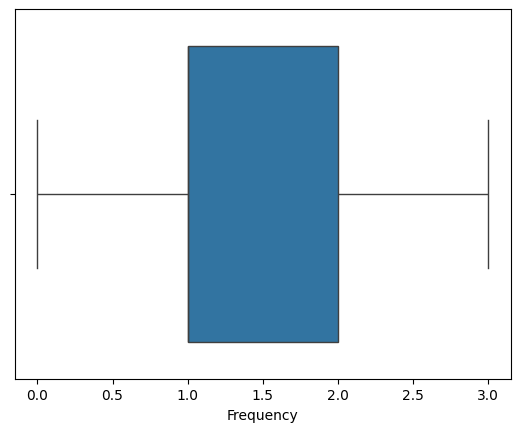

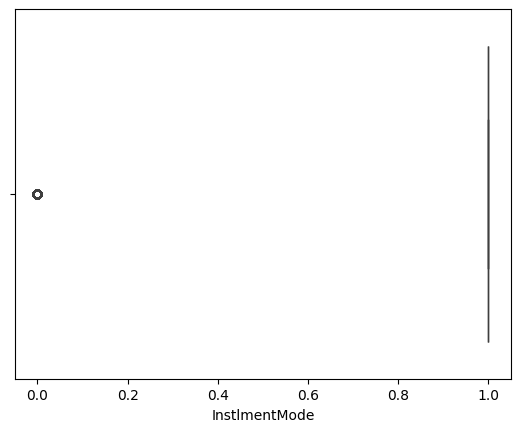

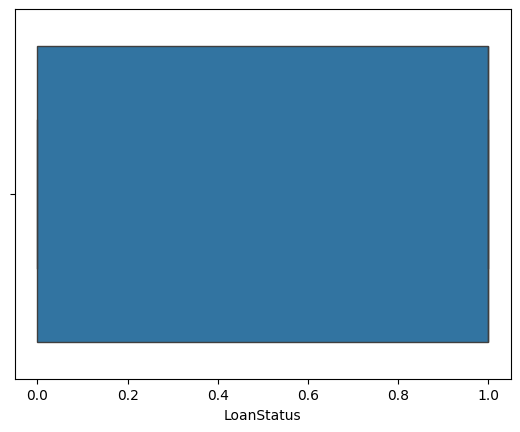

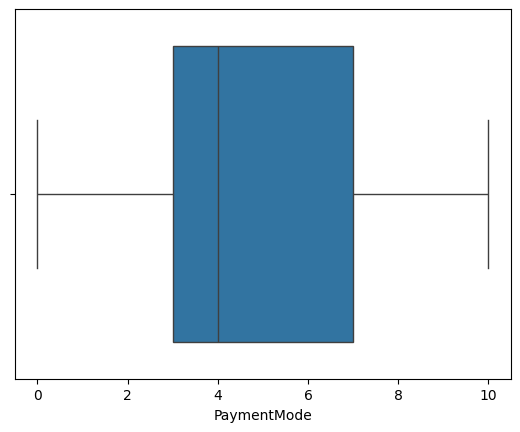

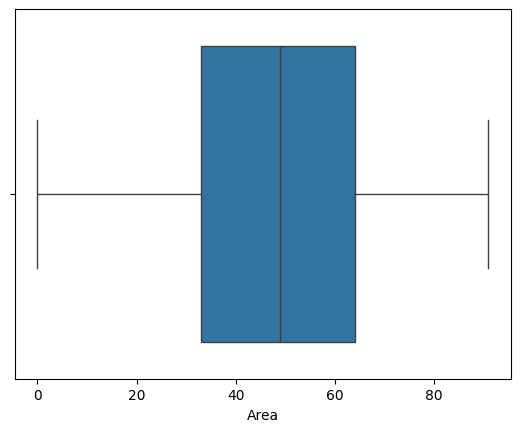

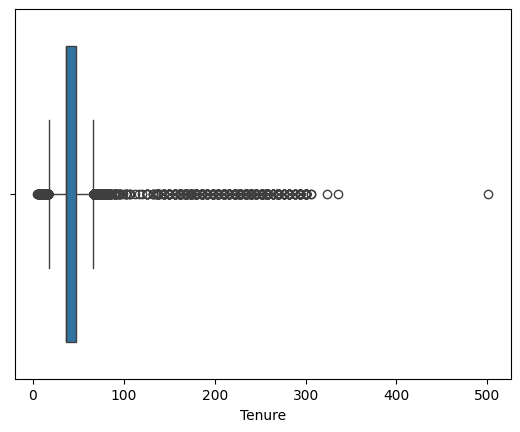

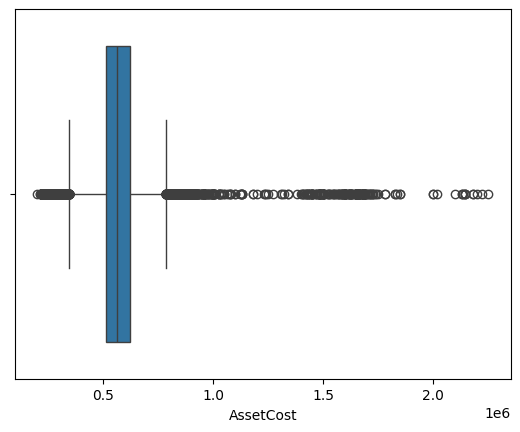

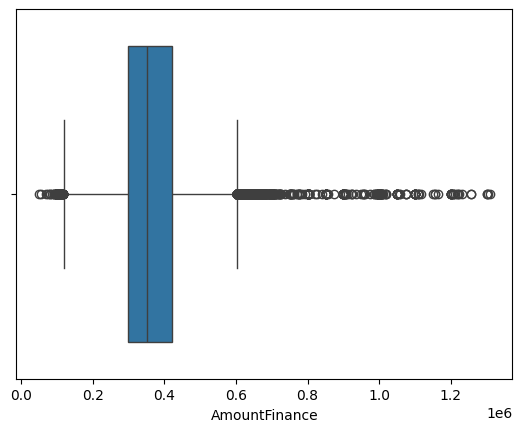

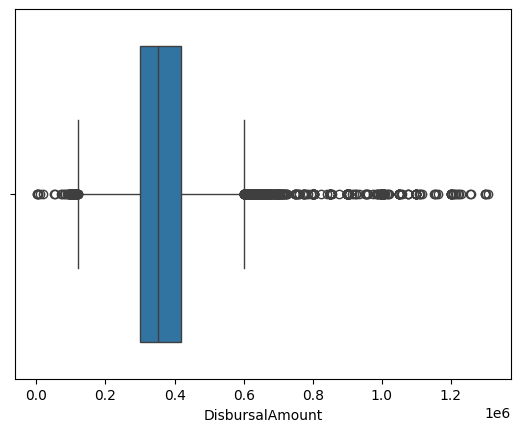

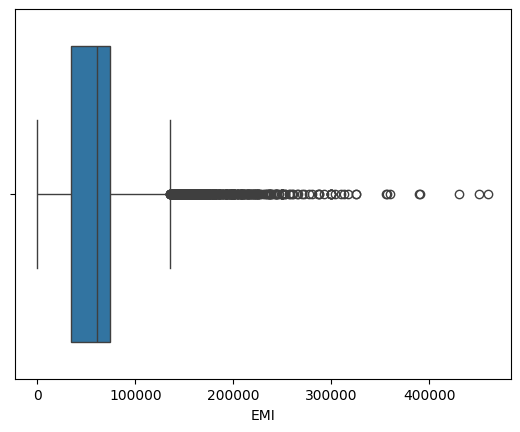

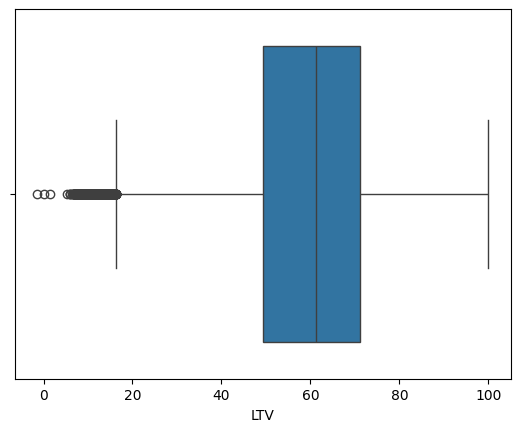

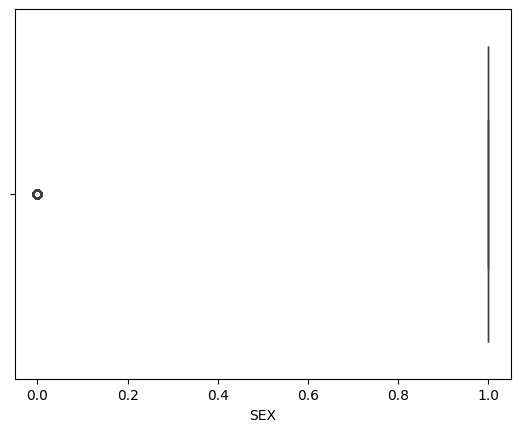

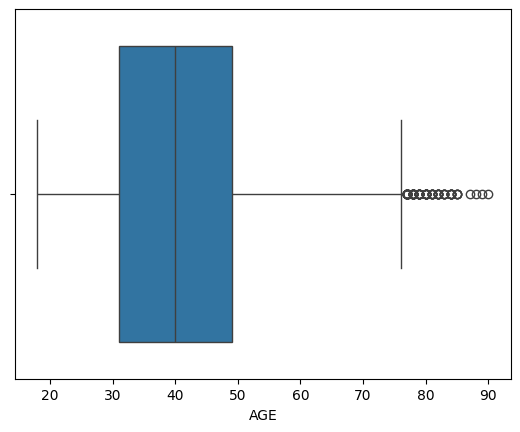

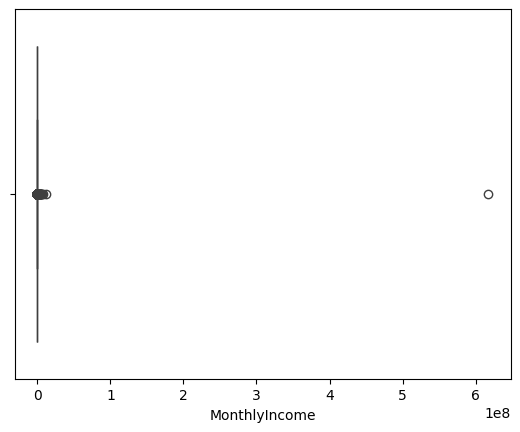

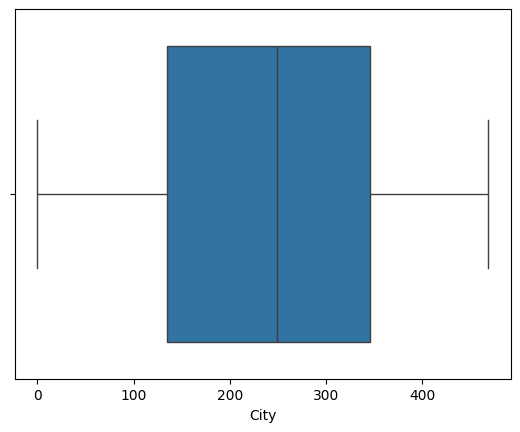

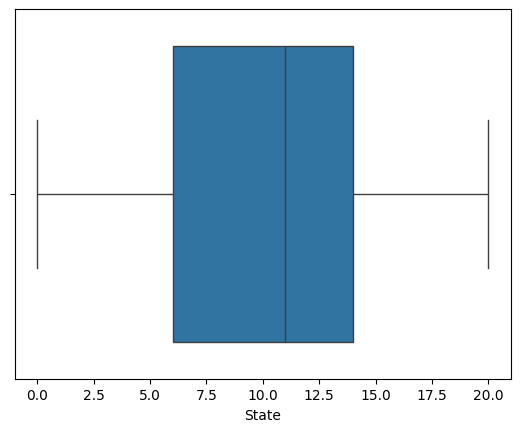

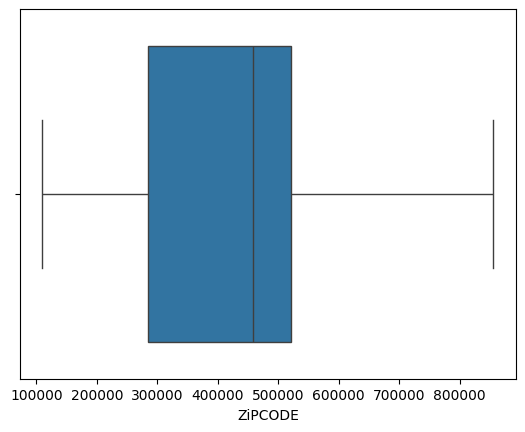

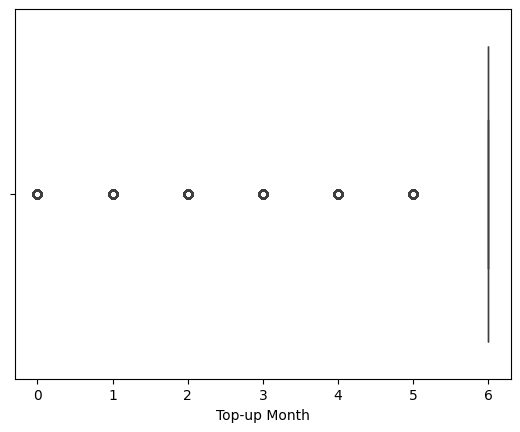

In [13]:
for i in en_df.columns:
    sns.boxplot(x = en_df[i])
    plt.show()

In [14]:
# for i in ltfs_df.columns:
#     if len(ltfs_df[i].unique())<10000:
#         print(i,ltfs_df[i].unique())

<Axes: >

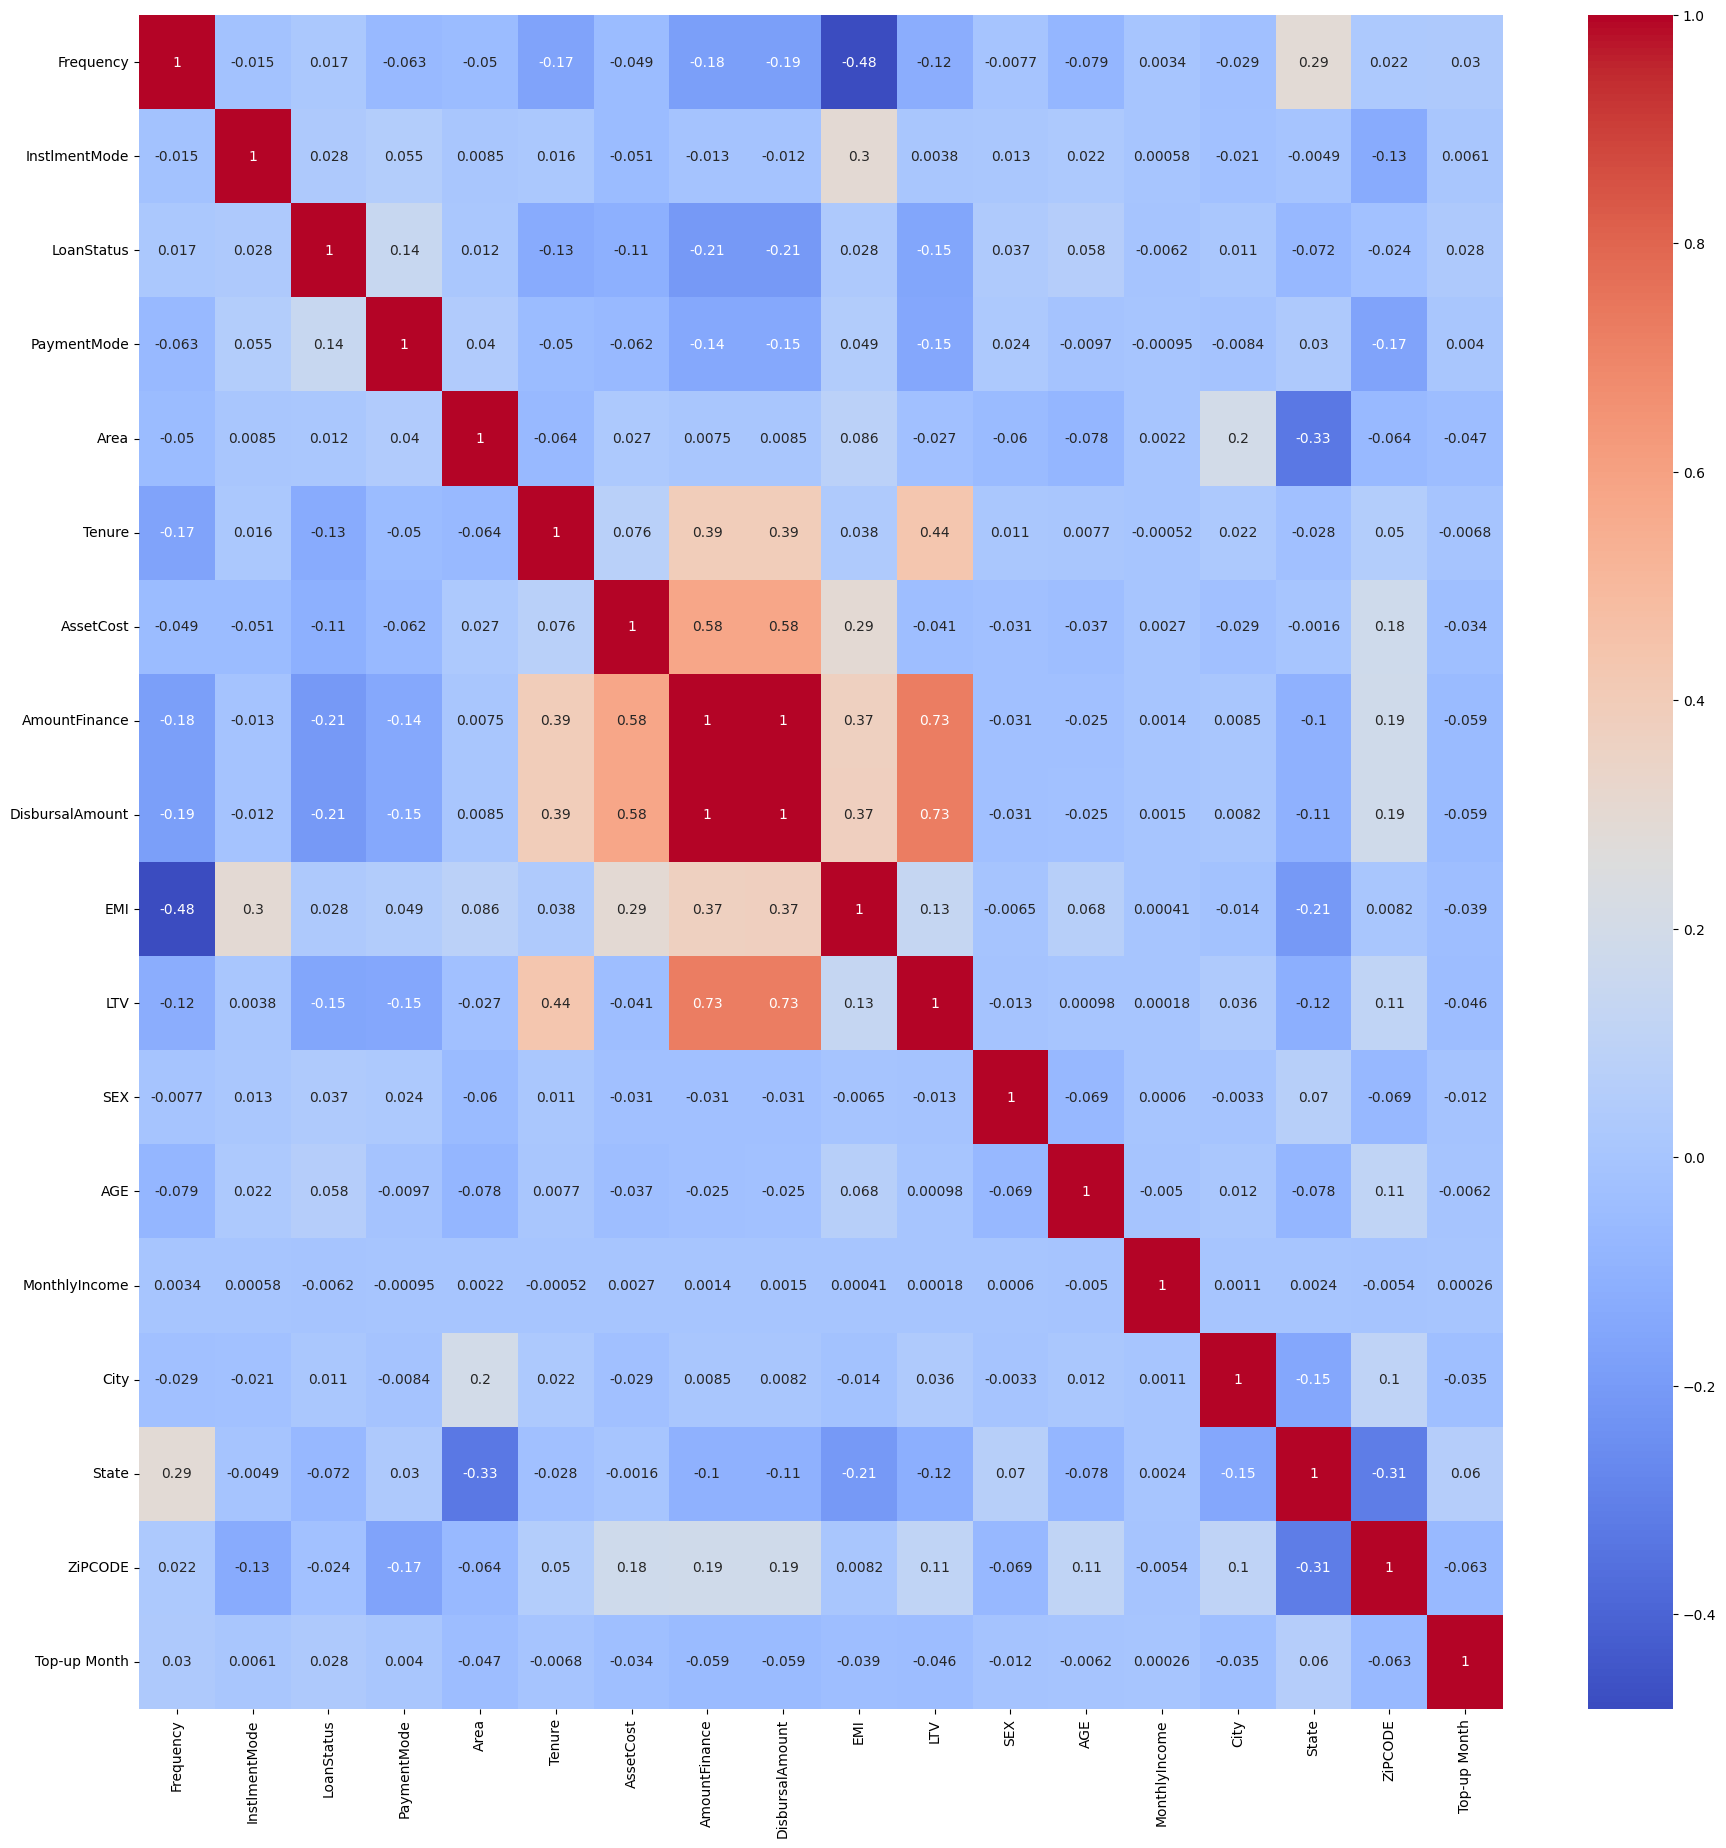

In [15]:
plt.figure(figsize=(22,22))
sns.heatmap(en_df.corr(),cmap='coolwarm',annot=True)

In [16]:
print('Before outlier removal : ',en_df.shape)
# cols = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population', 'Price']
z = np.abs(zscore(en_df, axis = 1))
threshold = 3.3
# print(np.where(z>threshold))
dataset = en_df[(z < threshold).all(axis=1)]
print('After Z-Score approach : ',dataset.shape)

Before outlier removal :  (107126, 18)
After Z-Score approach :  (100862, 18)


In [17]:
dataset.skew()

Frequency          1.096222
InstlmentMode     -4.980044
LoanStatus        -0.872452
PaymentMode        0.484220
Area              -0.085453
Tenure             5.918919
AssetCost          1.727954
AmountFinance      0.400858
DisbursalAmount    0.396188
EMI                0.671603
LTV               -0.459060
SEX               -3.805045
AGE                0.355574
MonthlyIncome      8.752735
City              -0.087977
State             -0.189761
ZiPCODE           -0.025176
Top-up Month      -2.396204
dtype: float64

In [18]:
dataset.kurt()

Frequency           -0.290492
InstlmentMode       22.801286
LoanStatus          -1.238852
PaymentMode         -0.647795
Area                -0.814615
Tenure              51.252268
AssetCost           22.072030
AmountFinance        2.925998
DisbursalAmount      2.954850
EMI                  4.314294
LTV                  0.009006
SEX                 12.478617
AGE                 -0.485227
MonthlyIncome      118.293129
City                -1.066236
State               -0.949636
ZiPCODE             -0.082788
Top-up Month         4.346712
dtype: float64

In [19]:
quantile_transformer = QuantileTransformer(output_distribution='normal')
dataset["Tenure"]= quantile_transformer.fit_transform(dataset["Tenure"].values.reshape(-1, 1)).flatten()

C:\Users\BAPS\AppData\Local\Temp\ipykernel_7516\3562844409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Tenure"]= quantile_transformer.fit_transform(dataset["Tenure"].values.reshape(-1, 1)).flatten()


In [20]:
quantile_transformer = QuantileTransformer(output_distribution='normal')
dataset["MonthlyIncome"]= quantile_transformer.fit_transform(dataset["MonthlyIncome"].values.reshape(-1, 1)).flatten()

C:\Users\BAPS\AppData\Local\Temp\ipykernel_7516\2434961859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["MonthlyIncome"]= quantile_transformer.fit_transform(dataset["MonthlyIncome"].values.reshape(-1, 1)).flatten()


In [21]:
quantile_transformer = QuantileTransformer(output_distribution='normal')
dataset["AssetCost"]= quantile_transformer.fit_transform(dataset["AssetCost"].values.reshape(-1, 1)).flatten()

C:\Users\BAPS\AppData\Local\Temp\ipykernel_7516\3420424728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["AssetCost"]= quantile_transformer.fit_transform(dataset["AssetCost"].values.reshape(-1, 1)).flatten()


In [22]:
y = dataset["Top-up Month"]
x= dataset.drop("Top-up Month",axis=1)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
lr = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=2000))
lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=2000))])

In [25]:
y_pred = lr.predict(X_test)


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8189659445793883

Confusion Matrix:
 [[    0     0     0     0     0     0  1319]
 [    0     0     0     0     0     0   168]
 [    0     0     0     0     0     0   366]
 [    0     0     0     0     0     0   577]
 [    0     0     0     0     0     0   541]
 [    0     0     0     0     0     0   680]
 [    0     0     1     0     0     0 16521]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1319
           1       0.00      0.00      0.00       168
           2       0.00      0.00      0.00       366
           3       0.00      0.00      0.00       577
           4       0.00      0.00      0.00       541
           5       0.00      0.00      0.00       680
           6       0.82      1.00      0.90     16522

    accuracy                           0.82     20173
   macro avg       0.12      0.14      0.13     20173
weighted avg       0.67      0.82      0.74     20173



c:\Users\BAPS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\BAPS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\BAPS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [27]:
c1=ltfs_df['City']=='TIKAMGARH'

df=ltfs_df[c1].reset_index()
df

,index,Frequency,InstlmentMode,LoanStatus,PaymentMode,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month
0,82475,Half Yearly,Arrear,Closed,Direct Debit,CHATTARPUR,24,525000,250000.0,250000.0,50000.0,47.62,M,42.0,45000.00,TIKAMGARH,MADHYA PRADESH,472115.0,No Top-up Service
1,82478,Half Yearly,Arrear,Closed,Direct Debit,CHATTARPUR,12,450000,100000.0,100000.0,32500.0,22.22,M,50.0,45000.00,TIKAMGARH,MADHYA PRADESH,472115.0,No Top-up Service
2,82479,Half Yearly,Arrear,Active,Direct Debit,CHATTARPUR,30,450000,240000.0,240000.0,30500.0,53.33,M,50.0,45000.00,TIKAMGARH,MADHYA PRADESH,472115.0,12-18 Months
3,82481,Half Yearly,Arrear,Active,Direct Debit,CHATTARPUR,30,525000,300000.0,300000.0,30000.0,57.14,M,33.0,45000.00,TIKAMGARH,MADHYA PRADESH,472001.0,12-18 Months
4,82483,Half Yearly,Arrear,Active,Direct Debit,CHATTARPUR,35,600000,420378.0,420378.0,125175.0,70.00,M,29.0,45000.00,TIKAMGARH,MADHYA PRADESH,472331.0,12-18 Months
5,82484,Half Yearly,Arrear,Active,Direct Debit,CHATTARPUR,24,530000,200000.0,200000.0,59600.0,26.49,M,43.0,45000.00,TIKAMGARH,MADHYA PRADESH,472221.0,No Top-up Service
6,82487,Half Yearly,Arrear,Active,PDC,CHATTARPUR,24,635000,500000.0,500000.0,150000.0,78.74,M,26.0,0.08,TIKAMGARH,MADHYA PRADESH,472115.0,No Top-up Service
7,82488,Monthly,Arrear,Active,PDC,CHATTARPUR,23,440000,279297.1,279297.1,14500.0,53.52,M,24.0,45000.00,TIKAMGARH,MADHYA PRADESH,472001.0,12-18 Months
8,82489,Half Yearly,Arrear,Active,Direct Debit,CHATTARPUR,24,530000,400000.0,400000.0,118000.0,75.47,F,30.0,45000.00,TIKAMGARH,MADHYA PRADESH,472001.0,12-18 Months
9,82490,Half Yearly,Arrear,Active,Direct Debit,CHATTARPUR,24,525000,200000.0,200000.0,58000.0,27.05,M,19.0,0.08,TIKAMGARH,MADHYA PRADESH,472111.0,No Top-up Service


In [ ]:
# !pip install imbalanced-learn

In [29]:
# Install imbalanced-learn if not already installed
# !pip install imbalanced-learn
import os
os.environ["SCIPY_ARRAY_API"] = "1"

from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification


from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
import numpy as np

# Generate a small imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Print the original class distribution
print("Original class distribution:", dict(zip(*np.unique(y, return_counts=True))))

# Initialize SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to generate synthetic samples for the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the new class distribution after SMOTE
print("Resampled class distribution:", dict(zip(*np.unique(y_resampled, return_counts=True))))


Original class distribution: {np.int64(0): np.int64(897), np.int64(1): np.int64(103)}
Resampled class distribution: {np.int64(0): np.int64(897), np.int64(1): np.int64(897)}
